In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
S0 = 100
K = 150
r = 0.02
sigma = 0.4
T = 2
M = 2000
W = np.random.randn(M)*np.sqrt(T)

In [3]:
# The estimator without change of measure
def estimator_P(W,r,sigma,T,S0,K):
    S_T = S0*np.exp(sigma*W+(r-0.5*sigma*sigma)*T)
    indicator_P = S_T>K
    delta_P = np.mean(indicator_P)
    variance_P = np.var(indicator_P)
    #print(delta_P)
    #print(variance_P)
    return delta_P,variance_P

In [4]:
delta_P,variance_P = estimator_P(W,r,sigma,T,S0,K)
print("Delta: "+str(delta_P))
print("Variance: "+str(variance_P))
P_therotical = 1- sts.norm.cdf((np.log(K/S0)-(r-0.5*sigma*sigma)*T)/(sigma*np.sqrt(T)))
print("Theoretical value of P: "+str(P_therotical))

Delta: 0.187
Variance: 0.15203099999999994
Theoretical value of P: 0.1764704945792922


# Conclusion
As we can see, the Monte Carlo estimator is not accurate enough with 2000 samples.

In [5]:
# The estimator after the change of measure
def estimator_Q(theta,W,r,sigma,T,S0,K):
    S_T = S0*np.exp(sigma*W+(r+sigma*theta-0.5*sigma*sigma)*T)
    indicator_Q = (S_T>K)* np.exp(-theta*(W+theta*T)+0.5*theta*theta*T)
    delta_Q = np.mean(indicator_Q)
    return delta_Q

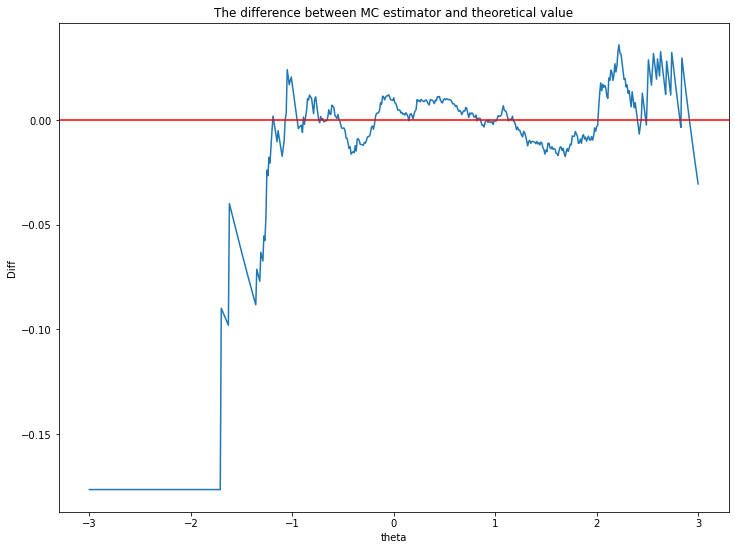

In [6]:
# explore the relation between theta and the error of estimator
step = 0.01
theta = np.arange(-3,3+step,step)
diff = []
for t in theta:
    diff.append(estimator_Q(t,W,r,sigma,T,S0,K)-P_therotical)

plt.figure(figsize=(12,9))
plt.plot(theta,diff)
plt.axhline(0,c ='r')
plt.title("The difference between MC estimator and theoretical value")
plt.xlabel("theta")
plt.ylabel("Diff")
plt.show()

In [7]:
def variance_Q(theta,W,r,sigma,T,S0,K):
    delta_Q = estimator_Q(theta,W,r,sigma,T,S0,K)
    S_T = S0*np.exp(sigma*W+(r+sigma*theta-0.5*sigma*sigma)*T)
    indicator_Q = (S_T>K)* np.exp(2*(-theta*(W+theta*T)+0.5*theta*theta*T))
    V = np.mean(indicator_Q) - delta_Q*delta_Q
    return V

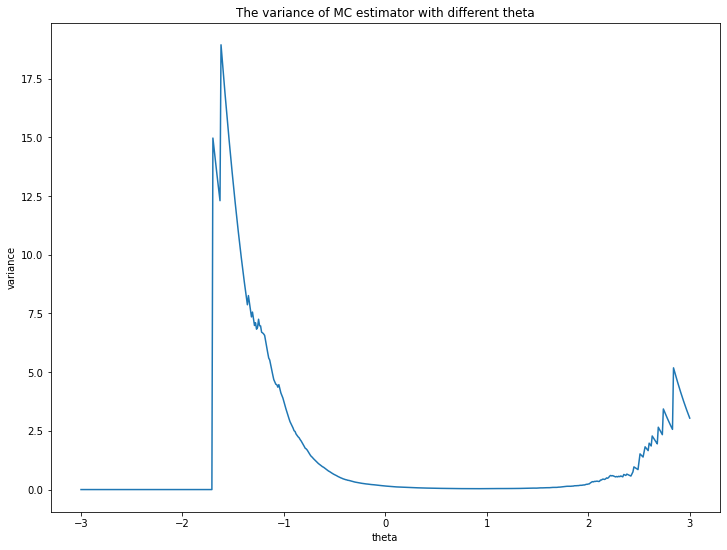

In [8]:
step = 0.01
theta = np.arange(-3,3+step,step)
variance = []
for t in theta:
    variance.append(variance_Q(t,W,r,sigma,T,S0,K))

plt.figure(figsize=(12,9))
plt.plot(theta,variance)
plt.title("The variance of MC estimator with different theta")
plt.xlabel("theta")
plt.ylabel("variance")
plt.show()

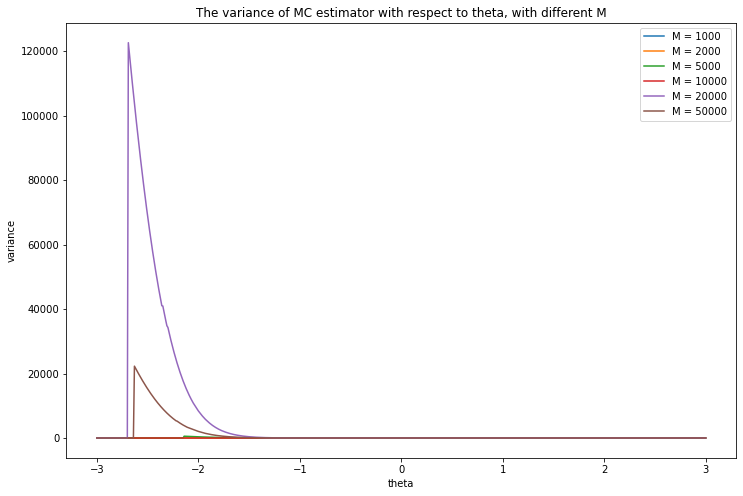

In [9]:
MM = [1000,2000,5000,10000,20000,50000]
plt.figure(figsize=(12,8))
for m in MM:
    W = np.random.randn(m)*np.sqrt(T)
    variance = []
    for t in theta:
        variance.append(variance_Q(t,W,r,sigma,T,S0,K))
    plt.plot(theta,variance, label = "M = "+str(m))
    
plt.title("The variance of MC estimator with respect to theta, with different M")
plt.xlabel("theta")
plt.ylabel("variance")
plt.legend(loc= "best")
plt.show()

# Conclusion
## 1.
The variance of the estimator converges as theta increase from -3 to 3
## 2.
As we explore the stability of the variance with different M, we can see that the stability increases with respective to M, and converges more quickly
